In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/ChatData.csv')

print(data.head())

                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0


In [5]:
sentences = list(data['Q'])+list(data['A'])

In [6]:
# 토크나이징
tokenized_sentences = [s.split() for s in sentences] #어절
sent_len_by_token = [len(t) for t in tokenized_sentences] #어절로 나눈 길이

sent_len_by_eumjeol = [len(s.replace(' ','')) for s in sentences] #음절로 나눈 길이

from konlpy.tag import Twitter
import konlpy

okt = konlpy.tag.Okt() 

morph_tokenized_sentences = [okt.morphs(s.replace(" ",'')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences] # 형태소 단위로 나눈 길이

Text(0, 0.5, 'Number of Sentences')

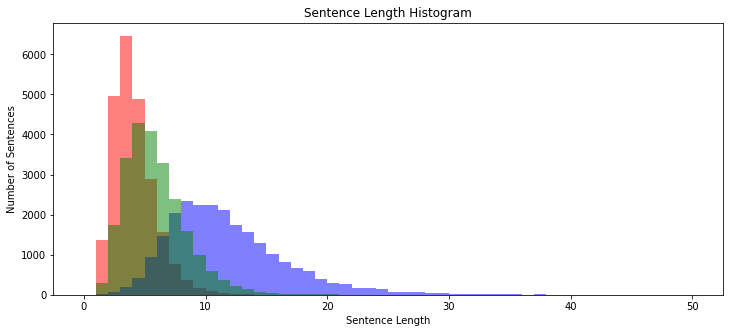

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.hist(sent_len_by_morph, bins=50,range=[0,50], alpha=0.5, color='g', label='morph')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

# 빨간색 = 어절, 형태소 = 초록색, 음절 = 파란색

Text(0, 0.5, 'Number of Sentences')

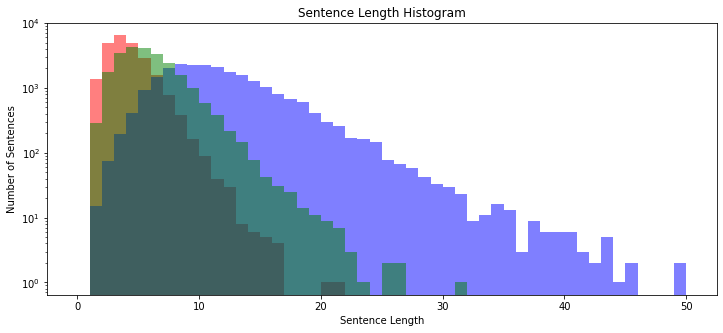

In [9]:
# 이상치 확인을 위해 y값의 크기 조정
plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.hist(sent_len_by_morph, bins=50,range=[0,50], alpha=0.5, color='g', label='morph')
plt.yscale('log') # 함수의 인자로 사용된 log는 각 그래프가 가지는 y값의 스케일을 조정함으로써 차이가 큰 데이터에 대해서도 함께 비교
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')


In [10]:
# 어절에 대한 각 통계값
import numpy as np

print('어절 최대 길이 : {}'.format(np.max(sent_len_by_token)))
print('어절 최소 길이 : {}'.format(np.min(sent_len_by_token)))
print('어절 평균 길이 : {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차 : {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간 길이 : {}'.format(np.median(sent_len_by_token)))
print('제 1사분위 길이 : {}'.format(np.percentile(sent_len_by_token,25)))
print('제 4사분위 길이 : {}'.format(np.percentile(sent_len_by_token,75)))

어절 최대 길이 : 21
어절 최소 길이 : 1
어절 평균 길이 : 3.64
어절 길이 표준편차 : 1.74
어절 중간 길이 : 3.0
제 1사분위 길이 : 2.0
제 4사분위 길이 : 5.0


In [13]:
# 음절에 대한 각 통계값
import numpy as np

print('음절 최대 길이 : {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소 길이 : {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균 길이 : {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차 : {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간 길이 : {}'.format(np.median(sent_len_by_eumjeol)))
print('제 1사분위 길이 : {}'.format(np.percentile(sent_len_by_eumjeol,25)))
print('제 4사분위 길이 : {}'.format(np.percentile(sent_len_by_eumjeol,75)))

음절 최대 길이 : 57
음절 최소 길이 : 1
음절 평균 길이 : 11.31
음절 길이 표준편차 : 4.98
음절 중간 길이 : 10.0
제 1사분위 길이 : 8.0
제 4사분위 길이 : 14.0


In [14]:
# 형태소에 대한 각 통계값
import numpy as np

print('형태소 최대 길이 : {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소 길이 : {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균 길이 : {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차 : {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간 길이 : {}'.format(np.median(sent_len_by_morph)))
print('제 1사분위 길이 : {}'.format(np.percentile(sent_len_by_morph,25)))
print('제 4사분위 길이 : {}'.format(np.percentile(sent_len_by_morph,75)))

형태소 최대 길이 : 31
형태소 최소 길이 : 1
형태소 평균 길이 : 5.41
형태소 길이 표준편차 : 2.56
형태소 중간 길이 : 5.0
제 1사분위 길이 : 4.0
제 4사분위 길이 : 7.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f2a6ea43b38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2a6e9cd588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2a6e9d8390>,
 'means': [<matplotlib.lines.Line2D at 0x7f2a6e9d8048>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2a6e9cdc88>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2a6ea43e48>,
  <matplotlib.lines.Line2D at 0x7f2a6f814f98>]}

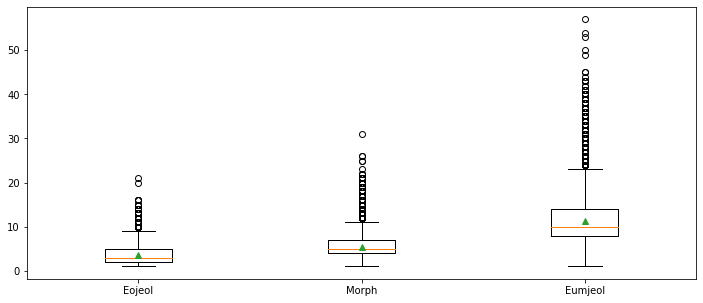

In [15]:
# boxplot으로 비교
plt.figure(figsize=(12,5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],labels=['Eojeol','Morph','Eumjeol'],showmeans=True)

In [16]:
# 형태소 길이로만 분석
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

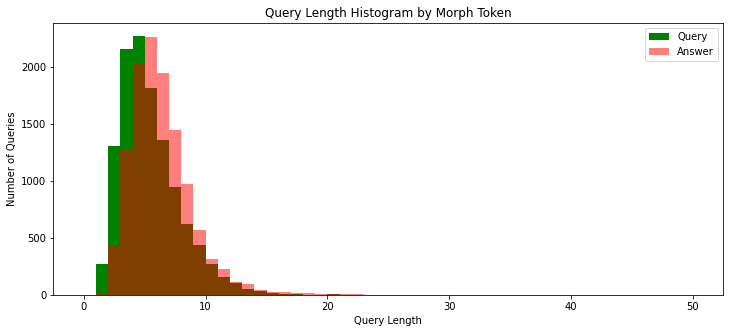

In [17]:
plt.figure(figsize=(12,5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50],color='g',label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50],color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

Text(0, 0.5, 'Number of Queries')

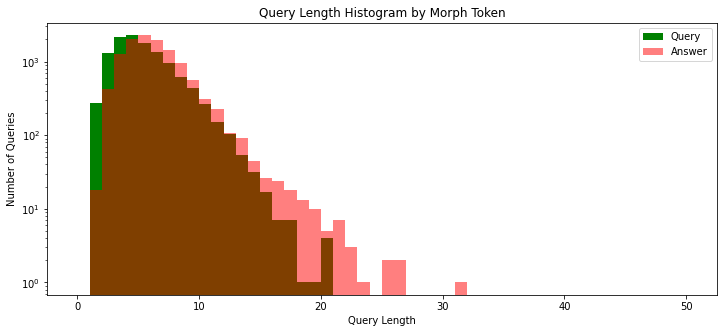

In [19]:
# 이상치 확인을 위해 y값의 크기 조정
plt.figure(figsize=(12,5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50],color='g',label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50],color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log',nonposy='clip')
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

{'boxes': [<matplotlib.lines.Line2D at 0x7f2a6d85d128>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2a6d85db38>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2a6d85b5f8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2a6d85b278>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2a6d85d438>,
  <matplotlib.lines.Line2D at 0x7f2a6d8640b8>]}

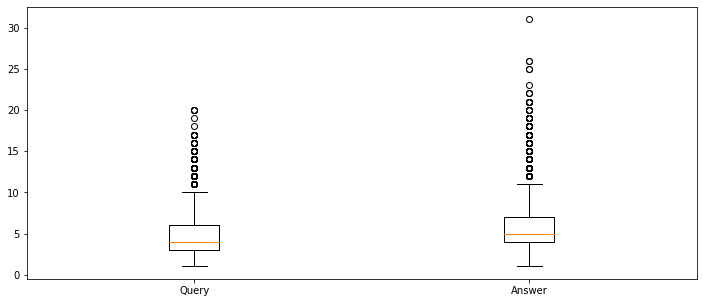

In [20]:
plt.figure(figsize=(12,5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph],labels=['Query','Answer'])

In [21]:
# 데이터 어휘 빈도 분석
# 데이터에서 사용되는 단어에 대해 분석해보자
# 어떤 단어가 사용되는지, 자주 사용되는 단어는 어떤 것들이 있는지
# 의미상 중요한 명사, 형용사, 동사만 따로 모은 후 빈도수 분석 진행

#예시
okt.pos('오늘밤은유난히춥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('춥구나', 'Verb')]

In [23]:
# noun, adverb, verb만 해서 list 구성
query_NVA_token_sentences= list()
answer_NVA_token_sentences= list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ','')):
        if tag == 'Noun' or tag == 'Verb' or tag =='Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ','')):
        if tag == 'Noun' or tag == 'Verb' or tag =='Adjective':
            answer_NVA_token_sentences.append(token)


query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences) #join -> 사이사이 추가

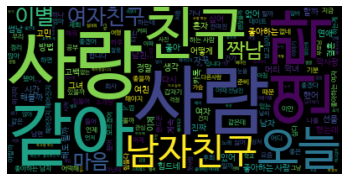

In [27]:
# 질문에 대한 워드클라우드
from wordcloud import WordCloud

query_wordcloud = WordCloud(font_path = '/content/drive/MyDrive/NanumBarunGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

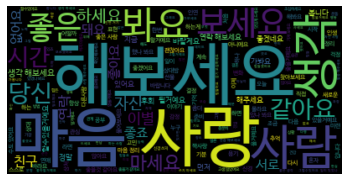

In [28]:
# 답변에 대한 워드클라우드
answer_wordcloud = WordCloud(font_path = '/content/drive/MyDrive/NanumBarunGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()